<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Parametric Distributions

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Parametric Distributions**. 

**YouTube Lecture**: check out my lectures on:

* [Parametric Distributions](https://youtu.be/U7fGsqCLPHU?si=JEMq6-FpCrHGt8jB)

This lecture is part of my [Data Analytics and Geostatistics Course](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

Parametric distributions may be relate to an underlying theory, for example,

Gaussian / Normal Distribution:

* the normal distribution is the limit distribution for the central limit theorem

Chi-squared Distribution:

* for square of Gaussian distributed random variables

Weibull (w-ā-bull) distribution:

* in reliability theory, $𝒇_𝒙 (𝒙)$ probability of failure over time, 𝒙

<figure style="text-align: center;">
  <img src="_static/parametric/train.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Damage from a steam train boiler explosion.</figcaption>
</figure>

If we know how samples should be distributed, then we can use that distribution in confidence intervals and hypothesis testing.

Other important aspects of parametric distributions and examples,

* **Known, useful statistical properties** - if Gaussian distributed all marginal and conditionals are Gaussian

* **Commonly occur in nature** - central limit theorem

* **Encompass a range of assumptions** - uniform distribution is the maximum uncertainty distribution

Here's a demonstration of making and general use of parametric distributions in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics at the Cockrell School of Engineering at the University of Texas at Austin.  

We cover the following distributions:

* Uniform
* Triangular
* Gaussian
* Log Normal

We will demonstrate:

* distribution parameters 
* forward and inverse operators
* summary statistics

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [3]:
supress_warnings = True
import numpy as np                                        # ndarrys for gridded data
import pandas as pd                                       # DataFrames for tabular data
import os                                                 # set working directory, run executables
import matplotlib.pyplot as plt                           # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                   # summary statistics
import math                                               # trigonometry etc.
import scipy.signal as signal                             # kernel for moving window calculation
import random                                             # for randon numbers
import seaborn as sns                                     # for matrix scatter plots
from scipy import linalg                                  # for linear regression
from sklearn import preprocessing
import geostatspy.GSLIB as GSLIB
plt.rc('axes', axisbelow=True)                            # grid behind plotting elements
if supress_warnings == True:
    import warnings                                       # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')  

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare functions

Here's a convenience function to add major and minor gridlines to our plots.

In [5]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [7]:
#os.chdir("c:/PGE383")                                    # set the working directory

#### Uniform Distribution

Let's start with the most simple distribution.

* by default a random number is uniform distributed

* this ensures that enough random samples (Monte Carlo simulations) will reproduce the distribution

\begin{equation}
x_{\alpha}^{s} = F^{-1}_x(p_{\alpha}), \quad X^{s} \sim F_X
\end{equation}

The continuous uniform distribution PDF is,

$$
f_x(x) = 
\begin{cases} 
\frac{1}{b - a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

and the continuous uniform distribution CDF is, 

$$
F_x(x) = 
\begin{cases} 
0 & \text{if } x \leq a \\
\frac{x - a}{b - a} & \text{if } a \leq x \leq b \\
1 & \text{if } x \geq b
\end{cases}
$$

To demonstrate the parameters I coded an interactive Python dashboard [Uniform PDF and CDF](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Parametric_Distributions.ipynb).

<figure style="text-align: center;">
  <img src="_static/parametric/interactive_uniform.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive uniform parametric distribution Python dashboard.</figcaption>
</figure>

Let's demonstrate the use of the command:

```python
scipy.stats.uniform.rvs(size=n, loc = low, scale = interval, random_state = seed)
```

Where:

* size is the number of samples

* loc is the minimum value

* scale is the range, maximum value minus the minimum value

* random_state is the random number seed

We will observe the convergence of the samples to a uniform distribution as the number of samples becomes large.

We will make a compact set of code by looping over all the cases of number of samples

* we store the number of samples cases in the list called ns

* we store the samples as a list of lists, called X_uniform


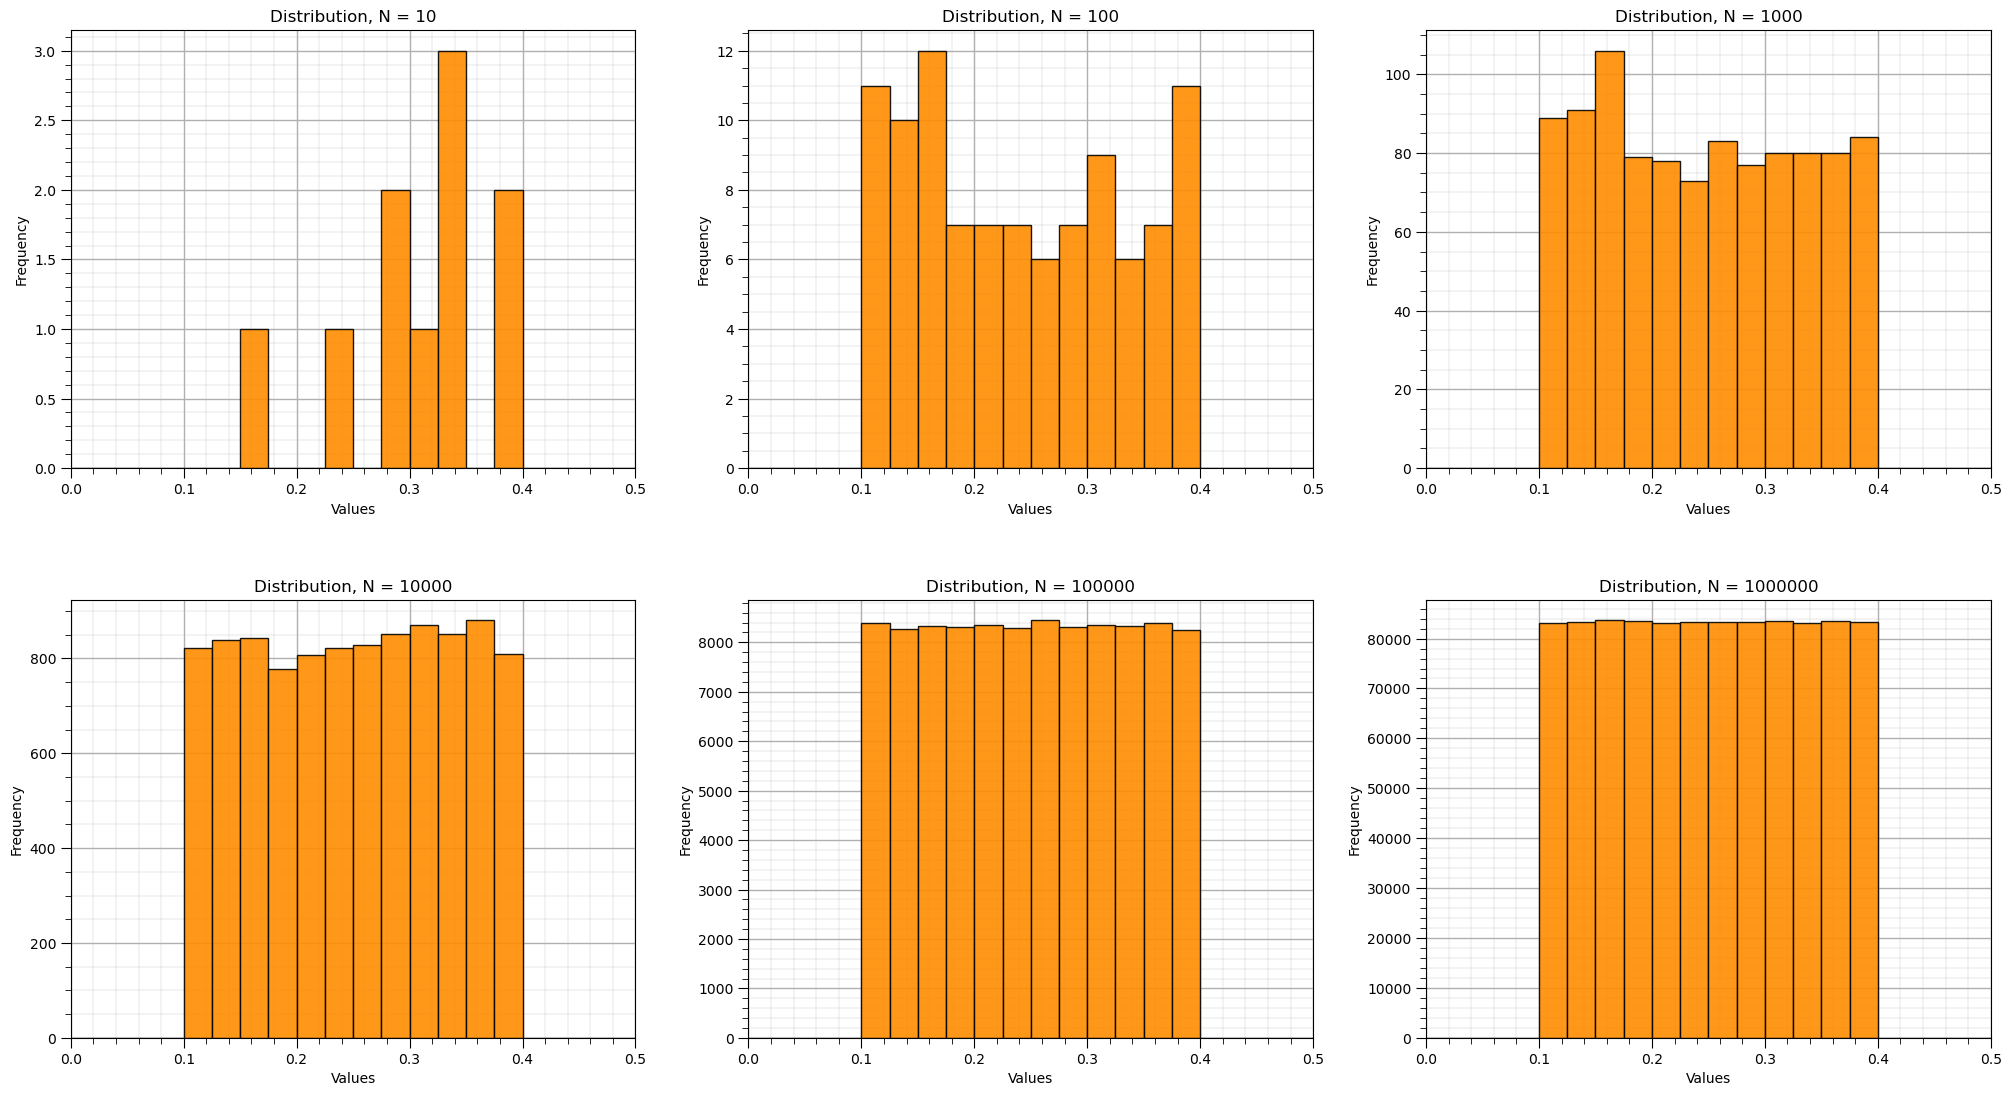

In [9]:
from scipy.stats import uniform

low = 0.10; interval = 0.30; ns = [1e1,1e2,1e3,1e4,1e5,1e6]; seed = 13; X_uniform = []

index = 0
for n in ns:
    X_uniform.append(uniform.rvs(size=int(ns[index]), loc = low, scale = interval, random_state=seed).tolist())
    plt.subplot(2,3,index+1)
    GSLIB.hist_st(X_uniform[index],0.0,0.5,log=False,cumul = False,bins=20,weights = None,xlabel='Values',title='Distribution, N = ' + str(int(ns[index])))
    add_grid()
    index = index + 1
        
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.1, wspace=0.2, hspace=0.3)

We can observe that by drawing more Monte Carlo simulations, we more closely approximate the original uniform parametric distribution.

##### Forward Distribution

Let's demonstrate the forward operator. We can take any value and calculate the associated:

* density (probability density function)
* cumulative probability

The transform for the probability density function is:

\begin{equation}
p = f_x(x)
\end{equation}

where $f_x$ is the PDF and $p$ is the density for value, $x$.

and for the cumulative distribution function is:

\begin{equation}
P = F_x(x)
\end{equation}

where $F_x$ is the CDF and $P$ is the cumulative probability for value, $x$. Let's use this to first plot the entire PDF and CDF.

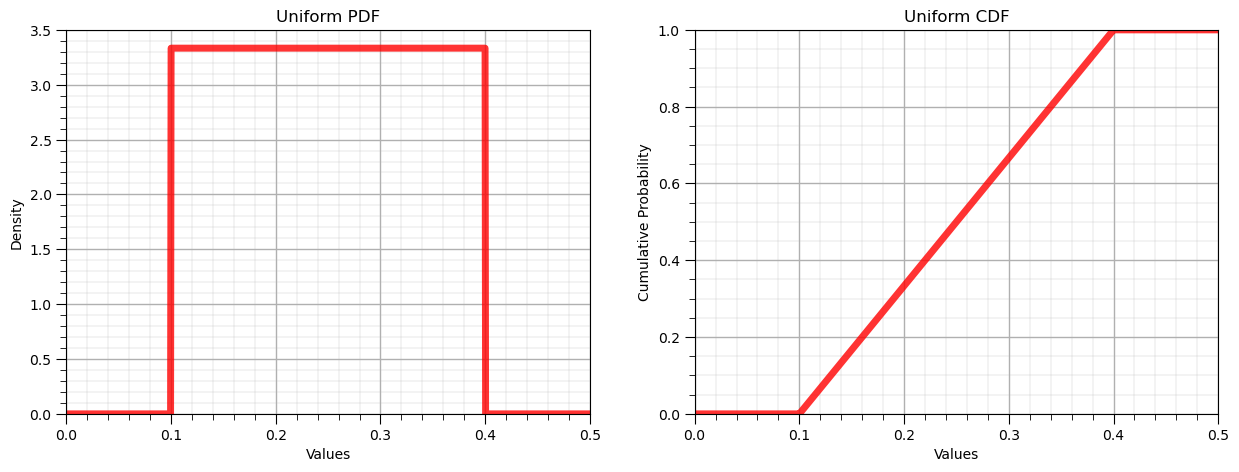

In [11]:
x_values = np.linspace(0.0,0.5,1000)                       # ndarray with regularly space values of the feature
p_values = uniform.pdf(x_values, loc = low, scale = interval) # f_x(x), densities from PDF
P_values = uniform.cdf(x_values, loc = low, scale = interval) # F_x(x), cumulative probabilities from CDF

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title('Uniform PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim([0,None]); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title('Uniform CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Forward Uniform Distribution, $f_x(x)$ and $F_x(x)$

Let's now demonstrate the forward operator for the uniform distribution:

Forward of Uniform PDF: $f_x(0.2) = 3.33$, use scipy.stats.[my_distribution].pdf()

Forward of Uniform CDF: $F_x(0.2) = 0.33$, use scipy.stats.[my_distribution].cdf()

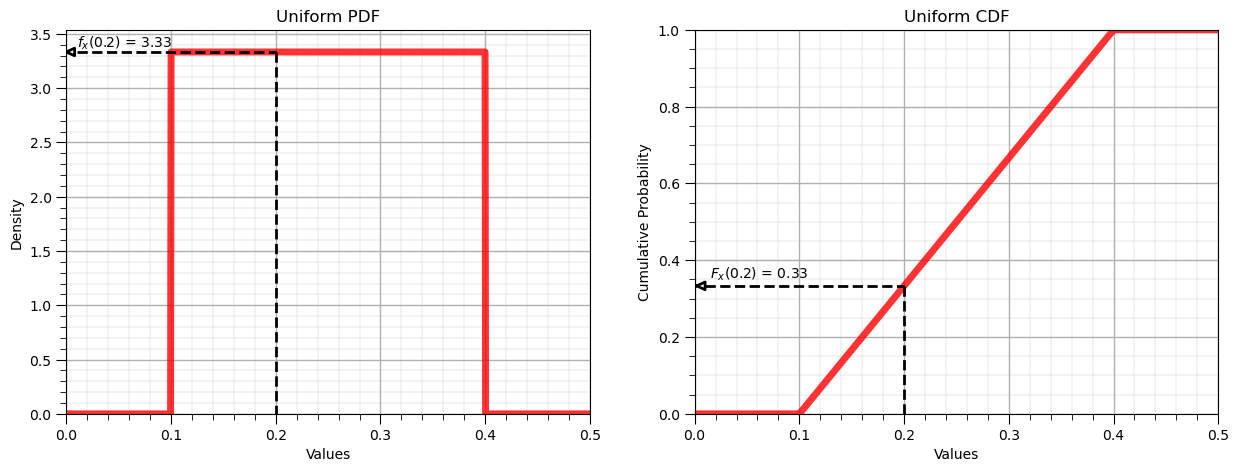

In [13]:
from IPython.display import display, Markdown

x = 0.2                                                       # a specific value of the feature to evaluate
p = uniform.pdf(x, loc = low, scale = interval)               # f_x(x), density of x from PDF
P = uniform.cdf(x, loc = low, scale = interval)               # F_x(x), cumulative probability of x from CDF

display(Markdown(fr'Forward of Uniform PDF: $f_x({x}) = {np.round(p,2)}$, use scipy.stats.[my_distribution].pdf()'))
display(Markdown(fr'Forward of Uniform CDF: $F_x({x}) = {np.round(P,2)}$, use scipy.stats.[my_distribution].cdf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title('Uniform PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.plot([0.01,x],[p,p],c='black',lw=2,ls='--'); plt.plot([x,x],[p,0],c='black',lw=2,ls='--')
plt.plot([0,0.008,0.008,0],[p,p-0.035,p+0.035,p],c='black',lw=2)
plt.annotate(r'$f_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(p,2)),xy=[0.01,p+0.04])
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title('Uniform CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.01,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0],c='black',lw=2,ls='--')
plt.plot([0.002,0.01,0.01,0.002],[P,P-0.01,P+0.01,P],c='black',lw=2)
plt.annotate(r'$F_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(P,2)),xy=[0.015,P+0.02])
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Inverse Distribution, $F^{-1}_x(x)$

Let's now demonstrate the reverse operator for the uniform distribution:

Inverse of Uniform CDF: $F^{-1}_x(0.87) = 0.36$, use scipy.stats.[my_distribution].ppf()

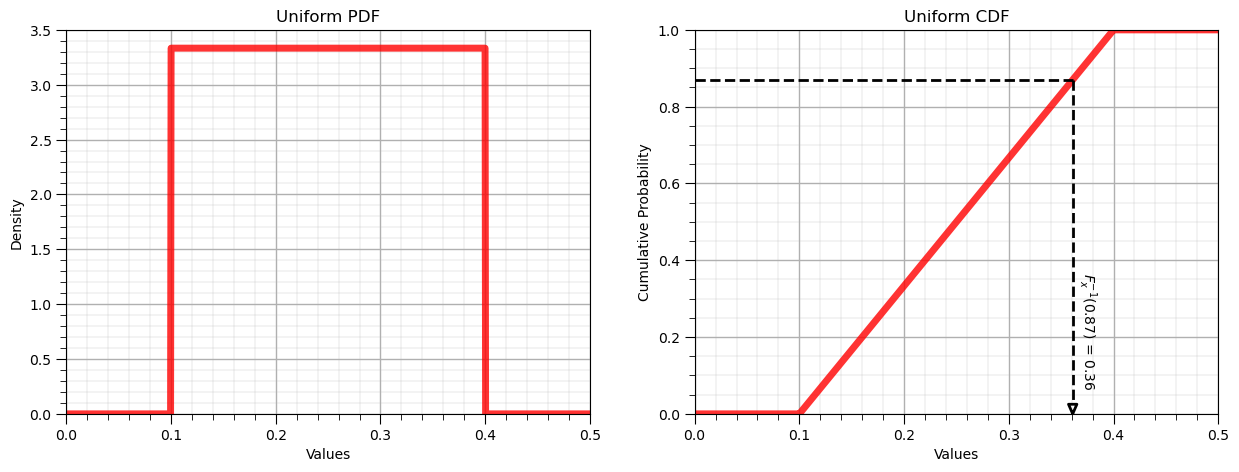

In [15]:
P = 0.87                                                      # a specific cumulative probablity
x = uniform.ppf(P, loc = low, scale = interval)               # F^{-1}_x(x), percentile in x of P from CDF

display(Markdown(fr'Inverse of Uniform CDF: $F^{{{-1}}}_x({P}) = {np.round(x,2)}$, use scipy.stats.[my_distribution].ppf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title('Uniform PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title('Uniform CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.00,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0.03],c='black',lw=2,ls='--')
plt.plot([x,x-0.004,x+0.004,x],[0,0.025,0.025,0],c='black',lw=2)
plt.annotate(r'$F^{-1}_x($' + str(np.round(P,2)) + '$)$ = ' + str(np.round(x,2)),xy=[x+0.003,0.08],rotation=270.0)
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Summary Statistics

We also have a couple of convience member functions to return the statistics from the parametric distribution:

* mean
* median
* mode
* variance
* standard deviation

Let's demonstrate a few of these methods.

```python
uniform.stats(loc = low, scale = interval, moments = 'mvsk')
```

returns a tuple with the mean, variance, skew and kurtosis (centered 1st, 2nd, 3rd and 4th moments)

In [17]:
print('Stats: mean, variance, skew and kurtosis = ' + str(uniform.stats(loc = low, scale = interval, moments = 'mvsk')))

Stats: mean, variance, skew and kurtosis = (0.25, 0.007499999999999999, 0.0, -1.2)


We can confirm this by calculating the centered variance (regular variance) with this member function:

```python
uniform.var(loc = low, scale = interval)
```

In [19]:
print('The variance is ' + str(round(uniform.var(loc = low, scale = interval),4)) + '.')

The variance is 0.0075.


We can also directly calculate the:

* standard deviation - std
* mean - mean
* median - median

We can also calculate order of a non-centered moment. The moment method allows us to calculate an non-centered moment of any order. Try this out.

In [28]:
m_order = 4
print('The ' + str(m_order) + 'th order non-centered moment is ' + str(np.round(uniform.moment(order = m_order, loc = low, scale = interval),2)))

The 4th order non-centered moment is 0.01


##### Symmetric Interval

We can also get the symmetric interval (e.g. prediction or confidence intervals) for any alpha level. 

* Note the program mislabels the value as alpha, it is actually the significance level (1 - alpha)

In [35]:
alpha = 0.05
print('The interval at alpha level ' + str(round(alpha,3)) + ' is ' + str(np.round(uniform.interval(confidence = 1-alpha,loc = low,scale = interval),2)))

The interval at alpha level 0.05 is [0.11 0.39]


#### Triangular Distribution

The triangular distribution is commonly used when the range and mode is known. It can be be used to specify symmetric and asymmetric distributions.

The continuous triangular distribution PDF is,

$$
f_x(x) = 
\begin{cases} 
\frac{2(x - a)}{(b - a)(c - a)} & \text{if } a \leq x < c \\
\frac{2(b - x)}{(b - a)(b - c)} & \text{if } c \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

and the continuous triangular distribution CDF is, 

$$
F_x(x) = 
\begin{cases} 
0 & \text{if } x < a \\
\frac{(x - a)^2}{(b - a)(c - a)} & \text{if } a \leq x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)} & \text{if } c \leq x \leq b \\
1 & \text{if } x > b
\end{cases}
$$

while all assume $a \le x \le b$.

The great thing about parametric distributions in Python with SciPy is that the above member functions are the same,

* we can plug and play other parametric distributions and repeat the above.

This time we will make it much more compact!  

* we will import the triangular distribution as my_dist and call the same functions as before
  
* we need a new parameter, the distribution mode (c parameter)

```python
scipy.stats.triang.pdf(size=n, loc = low, c = mode, scale = interval)
```

Where:

* loc is the minimum value

* mode is the mode of the triangular distribution

* scale is the range, maximum value minus the minimum value

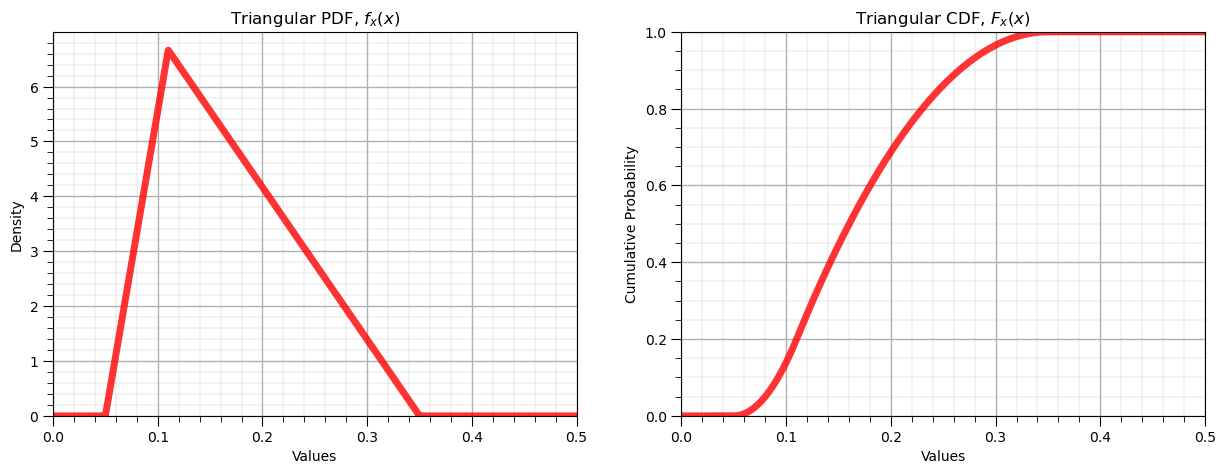

The mean is 0.17.
The variance is 0.0042.
The interval at an alpha level of 0.05 is [0.07 0.31]


In [40]:
P = 0.87                                                      # a specific cumulative probablity
from scipy.stats import triang as my_dist                     # import traingular dist as my_dist
dist_type = 'Triangular'                                      # give the name of the distribution for labels
low = 0.05; mode = 0.20; c = 0.10                             # given the distribution parameters
alpha = 0.05

x_values = np.linspace(0.0,0.5,1000)                          # get an array of x values
p_values = my_dist.pdf(x_values, loc = low, c = mode, scale = interval) # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = low, c = mode, scale = interval) # calculate cumulative probablity for each x value

plt.subplot(1,2,1)                                            # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title(str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim([0,None]); add_grid()

plt.subplot(1,2,2)                                            # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title(str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.5]); plt.ylim([0,1.0]); add_grid()

# p_values_inv = np.linspace(0.00001,0.99999,100)                   # get an array of p-values
# x_values_inv = my_dist.ppf(p_values, loc = low, c = mode, scale = interval) # apply inverse to get x values from p-values
# plt.subplot(1,3,3)
# plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
# plt.xlim([0.0,0.5]); plt.ylim([0,None]); add_grid()

#plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

print('The mean is ' + str(round(my_dist.mean(loc = low,c = mode, scale = interval),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = low, c = mode, scale = interval),4)) + '.')
print('The interval at an alpha level of ' + str(round(alpha,3)) + ' is ' + str(np.round(my_dist.interval(confidence = 1-alpha,loc = low,c = mode,scale = interval),2)))

The missing lower tail for the inverse is due to any value less than 0.05 having 0.0 cumulative probability.

##### Forward Triangular Distribution, $f_x(x)$ and $F_x(x)$

Let's now demonstrate the forward operator for the triangular distribution:

Forward of Triangular PDF: $f_x(0.25) = 2.78$, use scipy.stats.[my_distribution].pdf()

Forward of Triangular CDF: $F_x(0.25) = 0.86$, use scipy.stats.[my_distribution].cdf()

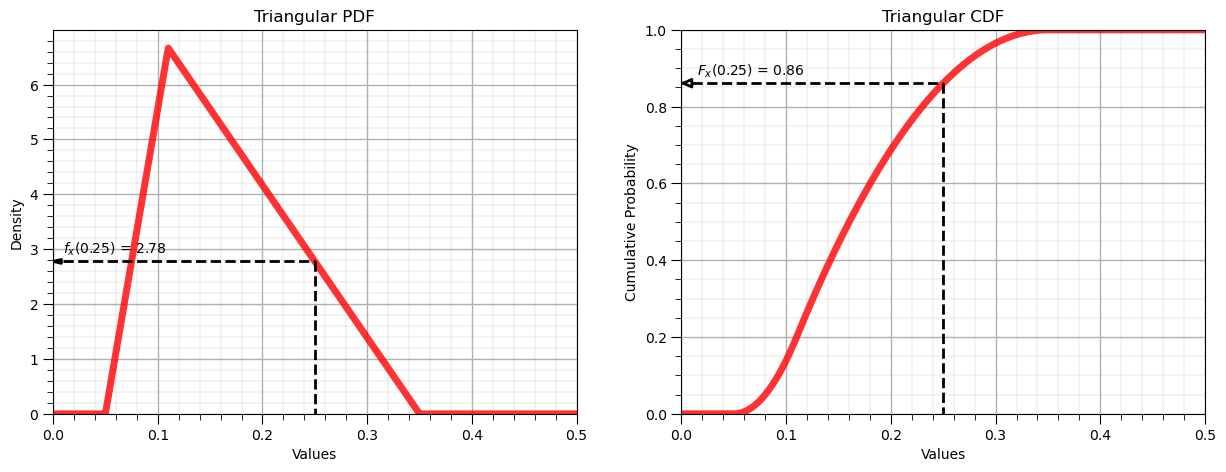

In [43]:
x = 0.25                                                      # a specific value of the feature to evaluate
p = my_dist.pdf(x, loc = low, c = mode, scale = interval)     # f_x(x), density of x from PDF
P = my_dist.cdf(x, loc = low, c = mode, scale = interval)     # F_x(x), cumulative probability of x from CDF

display(Markdown(fr'Forward of Triangular PDF: $f_x({x}) = {np.round(p,2)}$, use scipy.stats.[my_distribution].pdf()'))
display(Markdown(fr'Forward of Triangular CDF: $F_x({x}) = {np.round(P,2)}$, use scipy.stats.[my_distribution].cdf()'))


plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label=dist_type + ' PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.plot([0.01,x],[p,p],c='black',lw=2,ls='--'); plt.plot([x,x],[p,0],c='black',lw=2,ls='--')
plt.plot([0,0.008,0.008,0],[p,p-0.035,p+0.035,p],c='black',lw=2)
plt.annotate(r'$f_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(p,2)),xy=[0.01,p+0.15])
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label=dist_type + ' CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.01,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0],c='black',lw=2,ls='--')
plt.plot([0.002,0.01,0.01,0.002],[P,P-0.01,P+0.01,P],c='black',lw=2)
plt.annotate(r'$F_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(P,2)),xy=[0.015,P+0.02])
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Inverse Distribution, $F^{-1}_x(x)$

Let's now demonstrate the reverse operator for the triangular distribution:

Inverse of Triangular CDF: $F^{-1}_x(0.87) = 0.25$, use scipy.stats.[my_distribution].ppf()

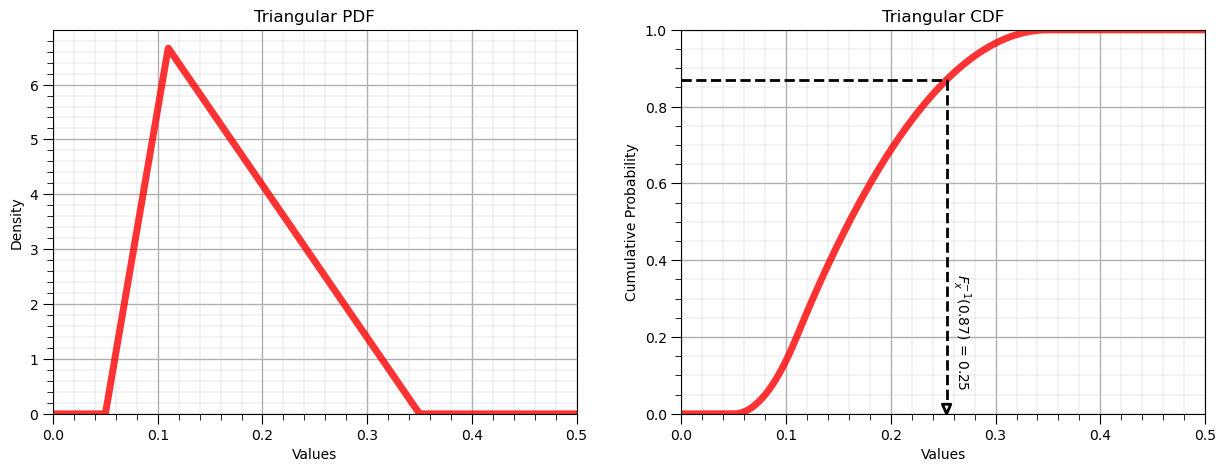

In [46]:
P = 0.87                                                      # a specific cumulative probablity
x = my_dist.ppf(P, loc = low, c = mode, scale = interval)     # F^{-1}_x(x), percentile in x of P from CDF

display(Markdown(fr'Inverse of Triangular CDF: $F^{{{-1}}}_x({P}) = {np.round(x,2)}$, use scipy.stats.[my_distribution].ppf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.00,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0.03],c='black',lw=2,ls='--')
plt.plot([x,x-0.004,x+0.004,x],[0,0.025,0.025,0],c='black',lw=2)
plt.annotate(r'$F^{-1}_x($' + str(np.round(P,2)) + '$)$ = ' + str(np.round(x,2)),xy=[x+0.003,0.08],rotation=270.0)
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Gaussian Distribution

Let's now use the Gaussian parametric distribution.

* we will need the parameters mean and the variance

The continuous Gaussian distribution PDF is,

$$
f_x(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right)
$$

and the continuous Gaussian distribution CDF is, 

$$
F_x(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

To demonstrate the parameters I coded an interactive Python dashboard [Uniform PDF and CDF](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Parametric_Distributions.ipynb).

<figure style="text-align: center;">
  <img src="_static/parametric/interactive_gaussian.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive Gaussian parametric distribution Python dashboard.</figcaption>
</figure>

We will apply the forward and reverse operations and calculate the summary statistics.

```python
scipy.stats.norm.pdf(size=n, loc = mean, scale = standard deviation)
```

Where:

* loc is the mean, arithmetic average

* scale is the standard deviation

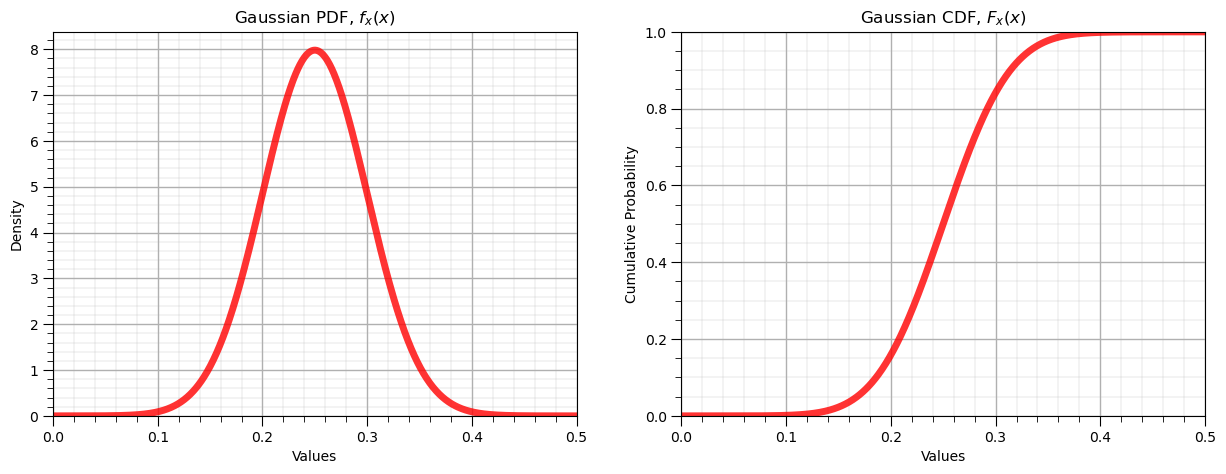

The mean is 0.25.
The variance is 0.0025.
The interval at an alpha level of 0.05 is [0.15 0.35]


In [51]:
P = 0.87                                                      # a specific cumulative probablity
from scipy.stats import norm as my_dist                       # import traingular dist as my_dist
dist_type = 'Gaussian'                                        # give the name of the distribution for labels
mean = 0.25; stdev = 0.05                                     # given the distribution parameters
alpha = 0.05

x_values = np.linspace(0.0,0.5,1000)                           # get an array of x values
p_values = my_dist.pdf(x_values, loc = mean, scale = stdev)   # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = mean, scale = stdev)   # calculate cumulative probablity for each x value

plt.subplot(1,2,1)                                            # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title(str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim([0,None]); add_grid()

plt.subplot(1,2,2)                                            # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title(str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.5]); plt.ylim([0,1.0]); add_grid()

# p_values = np.linspace(0.00001,0.99999,100)                   # get an array of p-values
# x_values = my_dist.ppf(p_values, loc = mean, scale = stdev)   # apply inverse to get x values from p-values
# plt.subplot(1,3,3)
# plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
# plt.xlim([0.0,0.3])

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.8, top=0.8, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

print('The mean is ' + str(round(my_dist.mean(loc = mean, scale = stdev),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = mean, scale = stdev),4)) + '.')
print('The interval at an alpha level of ' + str(round(alpha,3)) + ' is ' + str(np.round(my_dist.interval(confidence = 1-alpha,loc = mean,scale = stdev),2)))

##### Forward Gaussian Distribution, $f_x(x)$ and $F_x(x)$

Let's now demonstrate the forward operator for the Gaussian distribution:

Forward of Gaussian/Normal PDF: $f_x(0.2) = 4.84$, use scipy.stats.[my_distribution].pdf()

Forward of Gaussian/Normal CDF: $F_x(0.2) = 0.16$, use scipy.stats.[my_distribution].cdf()

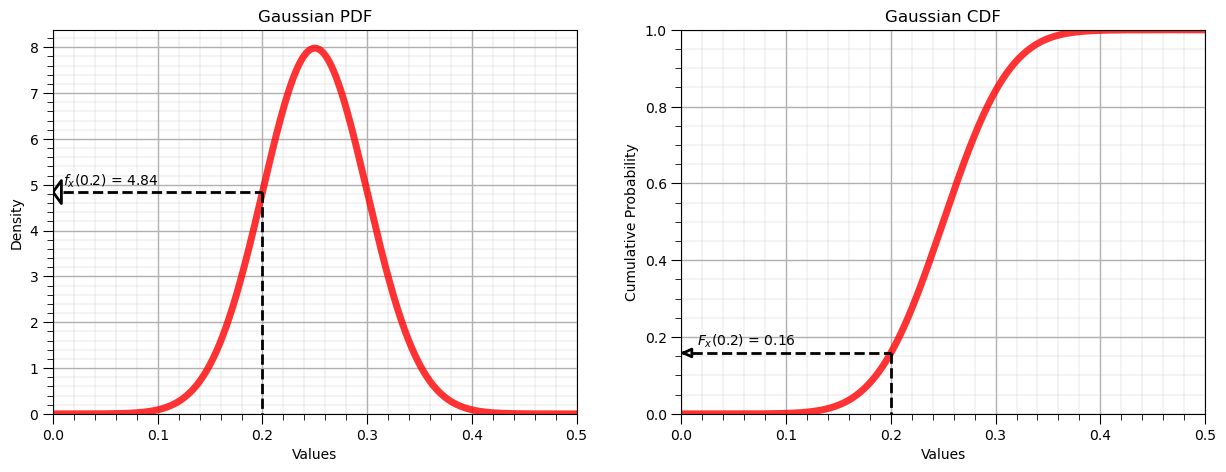

In [54]:
from scipy.stats import norm
x = 0.2
p = norm.pdf(x, loc = mean, scale = stdev)
P = norm.cdf(x, loc = mean, scale = stdev)

display(Markdown(fr'Forward of Gaussian/Normal PDF: $f_x({x}) = {np.round(p,2)}$, use scipy.stats.[my_distribution].pdf()'))
display(Markdown(fr'Forward of Gaussian/Normal CDF: $F_x({x}) = {np.round(P,2)}$, use scipy.stats.[my_distribution].cdf()'))


plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label=dist_type + ' PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.plot([0.01,x],[p,p],c='black',lw=2,ls='--'); plt.plot([x,x],[p,0],c='black',lw=2,ls='--')
plt.plot([0,0.008,0.008,0],[p,p-0.25,p+0.25,p],c='black',lw=2)
plt.annotate(r'$f_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(p,2)),xy=[0.01,p+0.15])
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label=dist_type + ' CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.01,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0],c='black',lw=2,ls='--')
plt.plot([0.002,0.01,0.01,0.002],[P,P-0.01,P+0.01,P],c='black',lw=2)
plt.annotate(r'$F_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(P,2)),xy=[0.015,P+0.02])
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Inverse Gaussian Distribution, $F^{-1}_x(x)$

Let's now demonstrate the reverse operator for the uniform distribution:

Inverse of Uniform CDF: $F^{-1}_x(0.87) = 0.31$, use scipy.stats.[my_distribution].ppf()

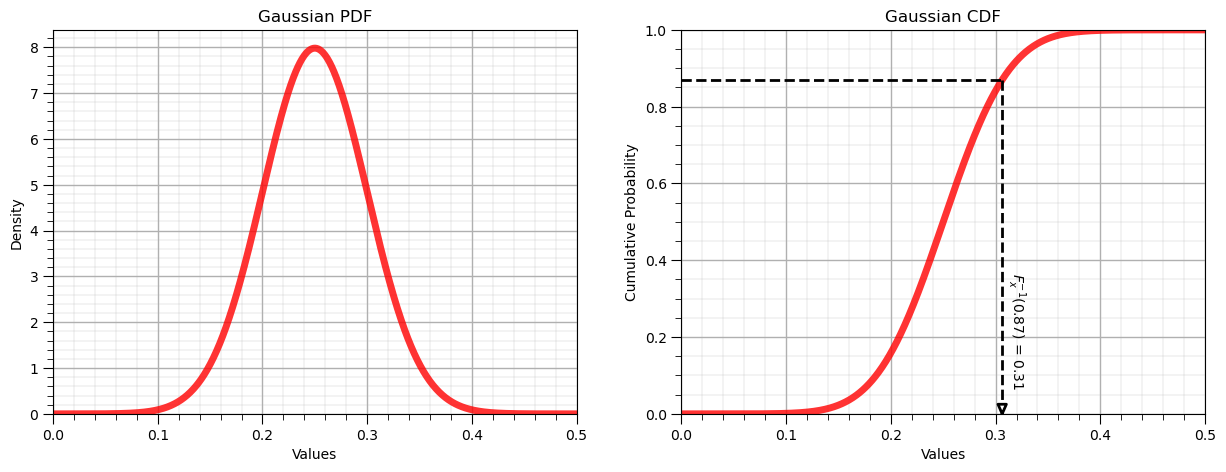

In [57]:
P = 0.87
x = norm.ppf(P, loc = mean, scale = stdev)

display(Markdown(fr'Inverse of Uniform CDF: $F^{{{-1}}}_x({P}) = {np.round(x,2)}$, use scipy.stats.[my_distribution].ppf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.00,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0.03],c='black',lw=2,ls='--')
plt.plot([x,x-0.004,x+0.004,x],[0,0.025,0.025,0],c='black',lw=2)
plt.annotate(r'$F^{-1}_x($' + str(np.round(P,2)) + '$)$ = ' + str(np.round(x,2)),xy=[x+0.003,0.08],rotation=270.0)
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Lognormal Distribution

Now let's check out the lognormal distribution.  

* We need the parameters $\mu$ and $\sigma$

The continuous lognormal distribution PDF is,

$$
f_x(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp \left( -\frac{1}{2} \left( \frac{\ln(x) - \mu}{\sigma} \right)^2 \right)
$$

and the continuous lognormal distribution CDF is, 

$$
F_x(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{\ln(x) - \mu}{\sigma \sqrt{2}} \right) \right]
$$

To demonstrate the parameters I coded an interactive Python dashboard [Uniform PDF and CDF](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Parametric_Distributions.ipynb).

<figure style="text-align: center;">
  <img src="_static/parametric/interactive_lognormal.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive lognormal parametric distribution Python dashboard.</figcaption>
</figure>

```python
scipy.stats.lognorm.pdf(size=n, s = sigma, scale = exp{mu})
```

Where:

* loc is the mean, arithmetic average

* scale is the standard deviation

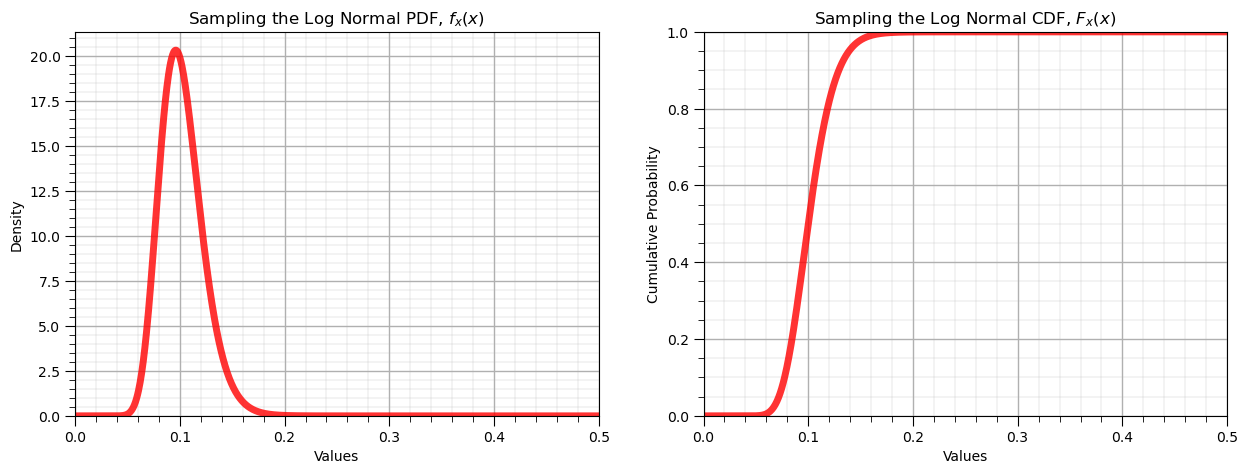

The mean is 0.102.
The variance is 0.0004.
The interval at alpha level 0.05 is [0.07 0.15]


In [62]:
from scipy.stats import lognorm as my_dist                                   # import traingular dist as my_dist
dist_type = 'Log Normal'                                                     # give the name of the distribution for labels
mu = np.log(0.10); sigma = 0.2                                               # given the distribution parameters
alpha = 0.05

x_values = np.linspace(0.0,0.5,1000)                                          # get an array of x values
p_values = my_dist.pdf(x_values, s = sigma, scale = np.exp(mu))              # calculate density for each x value
P_values = my_dist.cdf(x_values, s = sigma, scale = np.exp(mu))              # calculate cumulative probablity for each x value

plt.subplot(1,2,1)                                                           # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim([0,None]); add_grid()

plt.subplot(1,2,2)                                                           # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.5]); plt.ylim([0,1.0]); add_grid()

# p_values = np.linspace(0.00001,0.99999,100)                                        # get an array of p-values
# x_values = my_dist.ppf(p_values,  s = sigma, scale = np.exp(mu))             # apply inverse to get x values from p-values
# plt.subplot(1,3,3)
# plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
# plt.xlim([0.0,0.3])

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.8, top=0.8, wspace=0.2, hspace=0.3); plt.title('Sampling the Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

print('The mean is ' + str(round(my_dist.mean(s = sigma, scale = np.exp(mu)),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(s = sigma, scale = np.exp(mu)),4)) + '.')
print('The interval at alpha level ' + str(round(alpha,3)) + ' is ' + str(np.round(my_dist.interval(confidence = 1-alpha,s = sigma, scale = np.exp(mu)),2)))

##### Forward Log Normal Distribution, $f_x(x)$ and $F_x(x)$

Let's now demonstrate the forward operator for the Gaussian distribution:

Forward of Log Normal PDF: $f_x(0.1) = 19.95$, use scipy.stats.[my_distribution].pdf()

Forward of Log Normal CDF: $F_x(0.1) = 0.5$, use scipy.stats.[my_distribution].cdf()

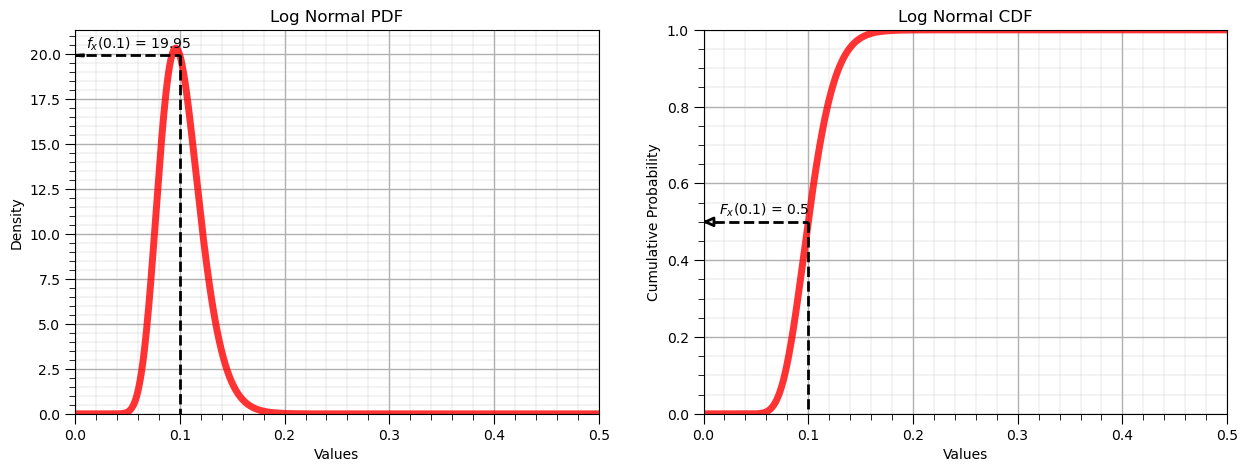

In [65]:
from scipy.stats import lognorm
x = 0.1
p = lognorm.pdf(x, s = sigma, scale = np.exp(mu))
P = lognorm.cdf(x, s = sigma, scale = np.exp(mu))

display(Markdown(fr'Forward of Log Normal PDF: $f_x({x}) = {np.round(p,2)}$, use scipy.stats.[my_distribution].pdf()'))
display(Markdown(fr'Forward of Log Normal CDF: $F_x({x}) = {np.round(P,2)}$, use scipy.stats.[my_distribution].cdf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label=dist_type + ' PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.plot([0.01,x],[p,p],c='black',lw=2,ls='--'); plt.plot([x,x],[p,0],c='black',lw=2,ls='--')
plt.plot([0,0.008,0.008,0],[p,p-0.035,p+0.035,p],c='black',lw=2)
plt.annotate(r'$f_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(p,2)),xy=[0.01,p+0.4])
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label=dist_type + ' CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.01,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0],c='black',lw=2,ls='--')
plt.plot([0.002,0.01,0.01,0.002],[P,P-0.01,P+0.01,P],c='black',lw=2)
plt.annotate(r'$F_x($' + str(np.round(x,2)) + '$)$ = ' + str(np.round(P,2)),xy=[0.015,P+0.02])
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

##### Inverse Lognormal Distribution, $F^{-1}_x(x)$

Let's know demonstrate the reverse operator for the uniform distribution:

Inverse of Log Normal CDF: $F^{-1}_x(0.9) = 0.13$, use scipy.stats.[my_distribution].ppf()

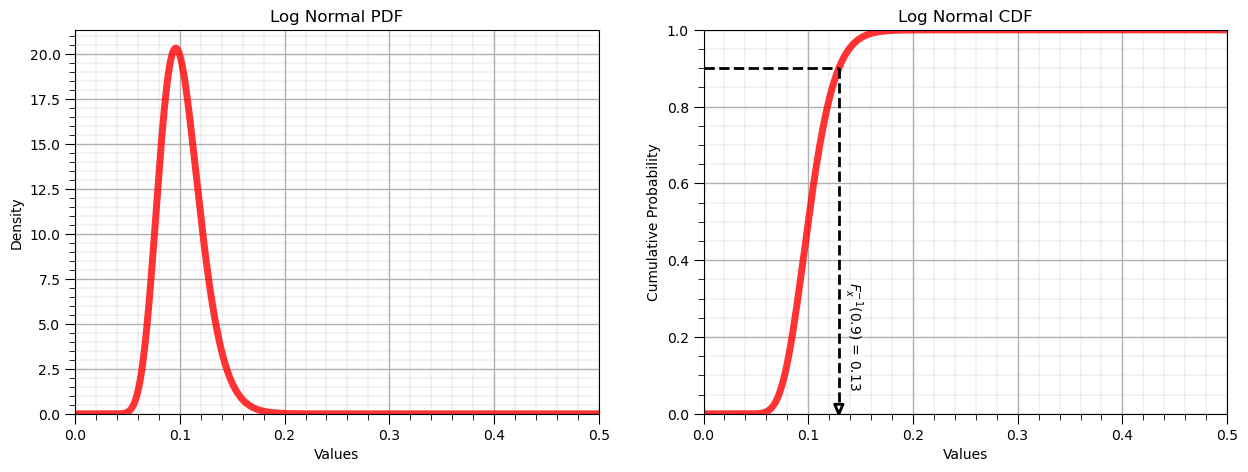

In [68]:
P = 0.90
x = lognorm.ppf(P, s = sigma, scale = np.exp(mu))

display(Markdown(fr'Inverse of Log Normal CDF: $F^{{{-1}}}_x({P}) = {np.round(x,2)}$, use scipy.stats.[my_distribution].ppf()'))

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label=dist_type + ' PDF'); plt.title(dist_type + ' PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.5]); plt.ylim(0,None); add_grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label=dist_type + ' CDF'); plt.title(dist_type + ' CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.plot([0.00,x],[P,P],c='black',lw=2,ls='--'); plt.plot([x,x],[P,0.03],c='black',lw=2,ls='--')
plt.plot([x,x-0.004,x+0.004,x],[0,0.025,0.025,0],c='black',lw=2)
plt.annotate(r'$F^{-1}_x($' + str(np.round(P,2)) + '$)$ = ' + str(np.round(x,2)),xy=[x+0.003,0.08],rotation=270.0)
plt.xlim([0.0,0.5]); plt.ylim([0,1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)